### This hands-on lab is to pre-processing an auto dataset. 
✔ link to download the data set: [Link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv)

In [376]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
# Changing the current directory
os.chdir('G:\My Drive\Career\IBM certificate\Database')

In [378]:
# reading the csv file using Pandas library
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header=None) # storing the csv file in a data frame named df

In [379]:
# add header manually to df
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

### Describing the data columns in the data frame

In [344]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Missing values

In [380]:
# replace the missing values with np.nan
df = df.replace('?',np.nan)

In [409]:
# we can count the number of missing values
df_nan = df.isnull()
column_with_nan = []
for column in df_nan.columns.values.tolist():
    if True in df_nan[column].values:
        print(column.upper(),":" , df_nan[column].value_counts(),'\n')
        column_with_nan.append(column)
# it appreas that column name "normalized_losses" has the highest number of missing values

#### Replacing the missing values with average value

In [410]:
df['num-of-doors'].replace('two',2, inplace=True)
df['num-of-doors'].replace('four',4, inplace=True)

In [411]:
for column in column_with_nan:
    df[column] = df[column].astype('float') # change the data type to float
    normalized_not_null = df[df[column].notnull()][column] # filter only the not null values
    normalized_not_null_avg = normalized_not_null.mean() # find the average value of the column
    df[column].replace(np.nan,normalized_not_null_avg, inplace=True) # replace the missing value with the average value

### Normalizing dataframe in python

In [307]:
# renaming the column normalized-losses to normalized_losses
df.rename(columns = ({'normalized-losses':'normalized_losses'}), inplace=True)

In [308]:
# finding the max mean min and std of the column normalized_losses
NL=df['normalized_losses']
NL_max = NL.max()
NL_avg = NL.mean()
NL_min = NL.min()
NL_std = NL.std()
df['normalized_losses'] = (NL-NL_avg)/NL_std # normalizing the column normalized_losses

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([-1.79918517, -1.19630032, -0.59341546,  0.0094694 ,  0.61235425,
         1.21523911,  1.81812396,  2.42100882,  3.02389367,  3.62677853,
         4.22966339]),
 <BarContainer object of 10 artists>)

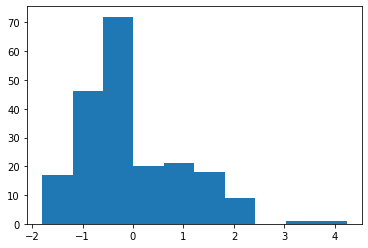

In [309]:
# ploting histogram of the normalized_losses
plt.hist(df['normalized_losses'])

### Binning in python: grouping the column in a data frame to 3 categories including low, medium, and max

In [310]:
df['price'] =  df['price'].astype('float')
price = df['price']
bins = np.linspace(min(price),max(price),4)
group_name = ('low', 'medium' , 'high')
df['price_binned']= pd.cut(df['price'] , bins, labels=group_name, include_lowest=True)

In [311]:
df['price_binned'].describe(include='all')

count     201
unique      3
top       low
freq      171
Name: price_binned, dtype: object

C:\Users\farha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\farha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price_binned', ylabel='normalized_losses'>

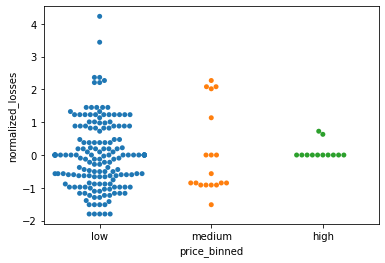

In [312]:
# the plot below shows that the low priced cars have higher population and higher number of losses. Also, the high priced cars
# have minimal number of losses
sns.swarmplot(df['price_binned'],df['normalized_losses'])

### Turning categorical variables into quantitative variables in Python (one-hot encoding technique)  
This technique is useful as many statistical analyses require numerical variables

In [313]:
# approach No. 1
df['gas'] = df['fuel-type']
df['diesel'] = df['fuel-type']

In [314]:
df['gas'] = df['gas'].replace('diesel',0)
df['gas'] = df['gas'].replace('gas',1)
df['diesel'] = df['diesel'].replace('diesel',1)
df['diesel'] = df['diesel'].replace('gas',0)

In [315]:
df[['diesel','gas']]

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [316]:
# approach No. 2 using Pandas
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0
